# Eigenfaces Grupo 1

Este código implementa una técnica de reconocimiento facial conocida como "Eigenfaces". 

La idea básica detrás de Eigenfaces es representar las caras de un conjunto de datos de entrenamiento en un espacio de características de dimensionalidad reducida utilizando el análisis de componentes principales (PCA). 

Luego, las nuevas caras se proyectan en este espacio de características y se comparan con las caras de entrenamiento para reconocerlas.

DEPENDENCIAS NECESARIAS:

Previo a ejecutar la notebook deben ser instaladas las siguientes dependencias:
* pip install opencv-python
* pip install pandas
* pip install matplotlib
* pip install scikit-learn


In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA

In [2]:
import re
def limpiar_string(string, limpiar=True):
    if limpiar:
        # Eliminar números seguidos de '.jpg'
        string = re.sub(r'\d+\.jpg', '', string)
        # Eliminar números seguidos de 'jpeg'
        string = re.sub(r'\d+\.jpeg', '', string)
        return string
    else:
        return string
    
def es_imagen_1(string):
    # Utilizar expresión regular para buscar '1.jp' sin otro '1' precediéndolo
    return bool(re.search(r'(?<!1)1\.jp', string))

In [3]:
# ruta imagen
path = 'fotos/Recorte manual' # colocar aqui las fotos
dim_reshape = 100 # en clase dicen 30 pero lo subo para aumentar la resolucion de las imagenes

# inicializa listas de caras y nombre de los archivos
faces1 = []
file_names1 = []
faces = []
file_names = []

# importa todas las imagenes
for filename in os.listdir(path):
    
    # importa imagen
    img = cv2.imread(os.path.join(path, filename))
    
    # convierte a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # redimensiona (dim_reshape x dim_reshape)
    resized = cv2.resize(gray, (dim_reshape, dim_reshape))
    
    # redimensionada en una matriz 1D de tamaño dim_reshape x dim_reshape
    flattened = resized.flatten()
    
    if es_imagen_1(filename):
        # appendea la imagen aplanada a la lista de caras
        faces1.append(flattened) 
        
        # appendea el nombre del archivo a la lista de archivos
        file_names1.append(limpiar_string(filename))
    else:
        faces.append(flattened) 
        file_names.append(limpiar_string(filename))
        
    
# convierte la lista en un numpy array
datos_imagenes = np.array(faces)
file_names_array = np.array(file_names)


# test
datos_imagenes1 = np.array(faces1)
file_names_array1 = np.array(file_names1)

In [4]:
# dimensiones del numpy array
datos_imagenes.shape

(227, 10000)

Text(0.5, 1.0, 'Cara Promedio')

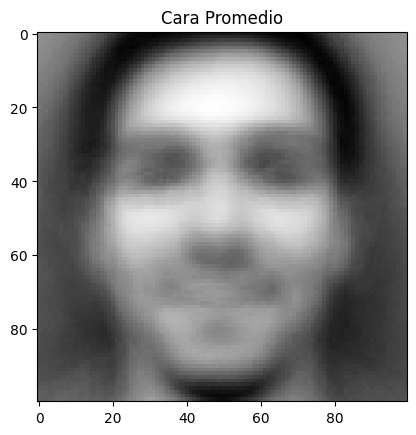

In [5]:
# obtiene y mustra la cara promedio
cara_promedio = np.mean(datos_imagenes, axis=0)
cara_promedio.shape
plt.imshow(cara_promedio.reshape(dim_reshape,dim_reshape),cmap="gray")
plt.title('Cara Promedio')

In [6]:
# muesta las imagenes
MOSTRAR_CARAS_ORIGINALES = False
caras = datos_imagenes #puede ser datos_imagenes o datos_imagenes1
if MOSTRAR_CARAS_ORIGINALES:
    fig, axes = plt.subplots(14, 16, figsize=(20, 20))  # ajusta el tamaño del subplot según la cantidad de imágenes

    for i, ax in enumerate(axes.flat):
        # verifica si i es menor que la longitud de datos_imagenes
        if i < len(caras):
            # muestra imagen
            ax.imshow(caras.reshape((-1, dim_reshape, dim_reshape))[i], cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')  # Si no hay más imágenes, desactiva el eje

    plt.tight_layout()
    plt.show()

In [7]:
# realiza pca
# IMPORTANTE! al aumentar el nro de componentes tambien aumenta la precision en la comparacion de imagenes para la clasificacion al final de la notebook!
# Tiene sentido porque aumento el porcentaje de variabilidad explicada por las componentes, acercandome mas a la realidad
n_pca = 60
pca = PCA(n_components=n_pca).fit(datos_imagenes)

eigenfaces = pca.components_
varianza_explicada = pca.explained_variance_ratio_

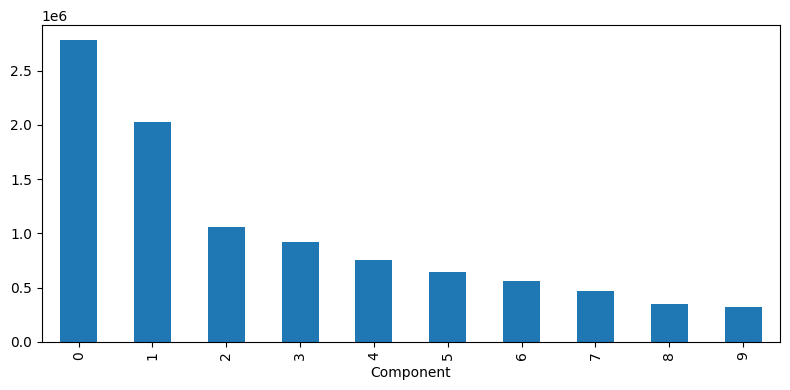

In [8]:
# grafico de variancia explicada por cada componente (DESCONSIDERAR!!! NO ES IMPORTANTE a diferencia de un PCA para datos tabulares!!!)
explained_variance = pd.DataFrame(pca.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(8, 4))
ax.set_xlabel('Component')
plt.tight_layout()
plt.show()

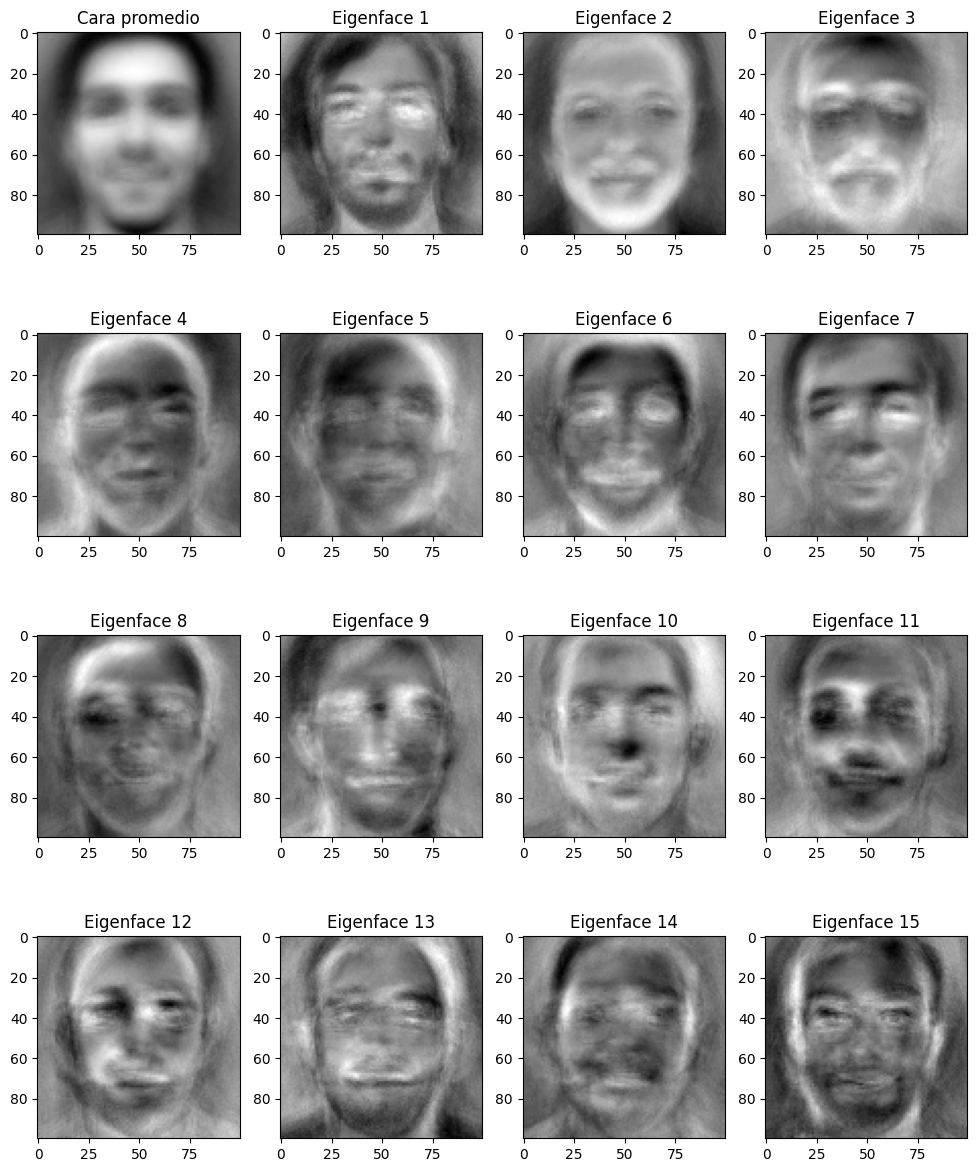

In [9]:
fig, ax = plt.subplots(4, 4, figsize=(12, 15))

ax[0, 0].imshow(cara_promedio.reshape(dim_reshape, dim_reshape), cmap="gray")
ax[0, 0].set_title("Cara promedio")

for i in range(0,15): # primeras 15 pca
    ax[(i+1) // 4, (i+1) % 4].imshow(eigenfaces[i].reshape(dim_reshape, dim_reshape), cmap="gray")
    ax[(i+1) // 4, (i+1) % 4].set_title(f"Eigenface {i+1}")

plt.show()

In [10]:
from sklearn.metrics import euclidean_distances

# define funciones de reconocimiento
def proyeccion_sobre_eigenfaces(imagen):
    #return np.dot(imagen - cara_promedio, eigenfaces.T) #aplicando multiplicacion de matrices
    return pca.transform(imagen.reshape(1,-1)) # usando directamente metodo transform de pca para obtener la proyeccion de la nueva imagen en las primeras 20 dimensiones

def reconocimiento_facial(imagen):
    proyeccion = proyeccion_sobre_eigenfaces(imagen)
    distancias = euclidean_distances(proyeccion, pca.transform(datos_imagenes))
    return file_names_array[np.argmin(distancias)]

Se definen dos funciones principales:

* proyeccion_sobre_eigenfaces(imagen): Esta función toma una imagen de entrada y la proyecta sobre las "eigenfaces" (vectores propios) calculadas previamente. Devuelve la proyección de la imagen sobre las eigenfaces.

* reconocimiento_facial(imagen): Esta función realiza el reconocimiento facial propiamente dicho. Toma una imagen de entrada, la proyecta sobre las eigenfaces y luego calcula la distancia euclidiana entre esta proyección y las proyecciones de las imágenes de entrenamiento. Devuelve el nombre del archivo de la imagen de entrenamiento más cercana a la imagen de entrada en el espacio de características.

Se realiza una llamada a la función reconocimiento_facial(imagen) con una imagen de entrada dada.

El nombre del archivo de la imagen de entrenamiento más cercana se imprime en la salida.

En resumen, este código implementa un sistema simple de reconocimiento facial utilizando el método de Eigenfaces.

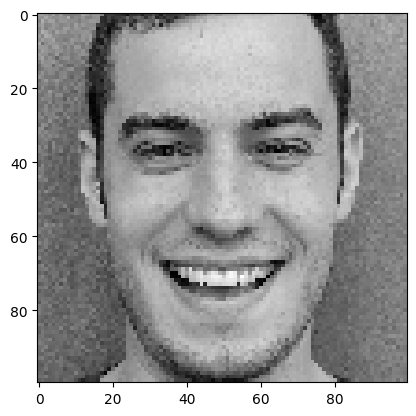

In [11]:
indice_lautaro = np.where(file_names_array1 == 'lautaro')[0]

# file_names_array1[indice_lautaro[0]]

imagen_prueba = datos_imagenes1[indice_lautaro[0]]
imagen_prueba = np.array(imagen_prueba).flatten()

plt.imshow(imagen_prueba.reshape(dim_reshape,dim_reshape),cmap="gray")

In [12]:
prediccion = reconocimiento_facial(imagen_prueba)

print(f"Predicción: {prediccion}")


Predicción: lautaro


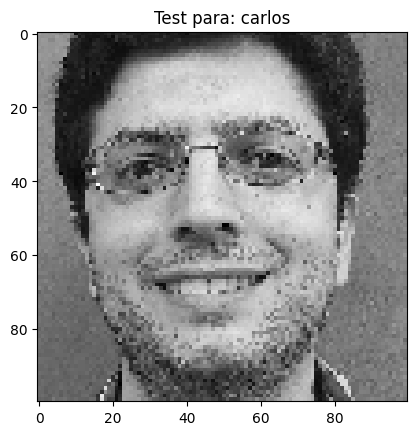

Predicción: carlos


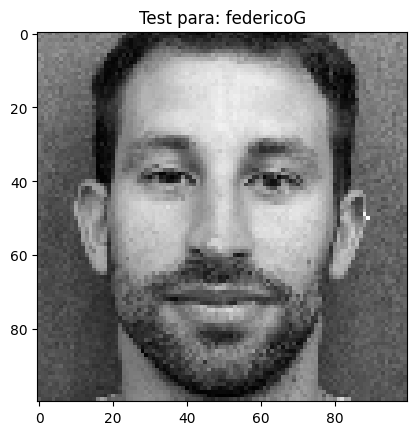

Predicción: federicoG


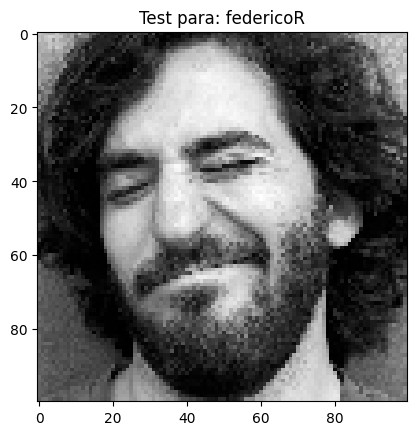

Predicción: federicoR


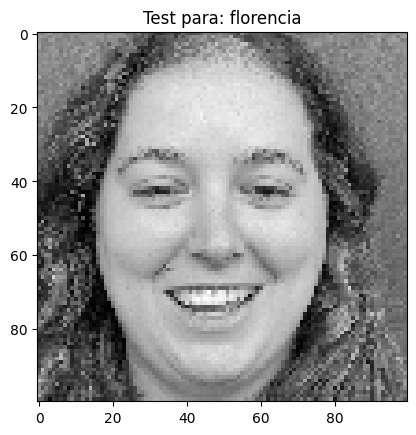

Predicción: florencia


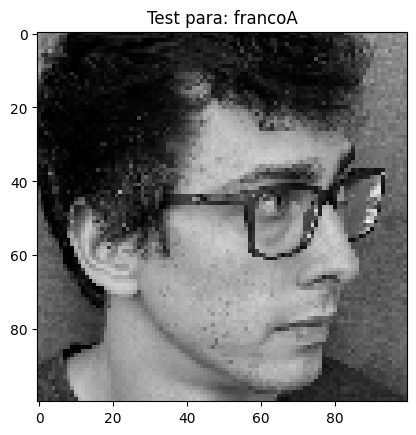

Predicción: francoA


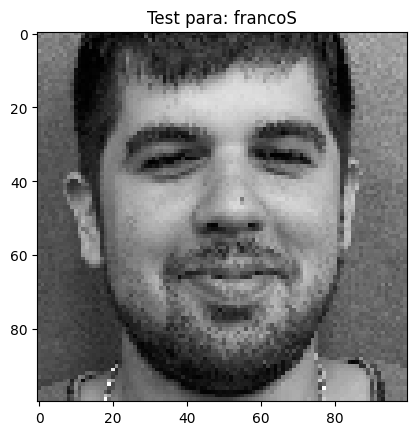

Predicción: francoS


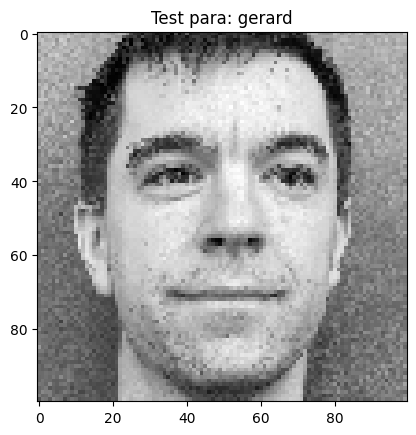

Predicción: gerard


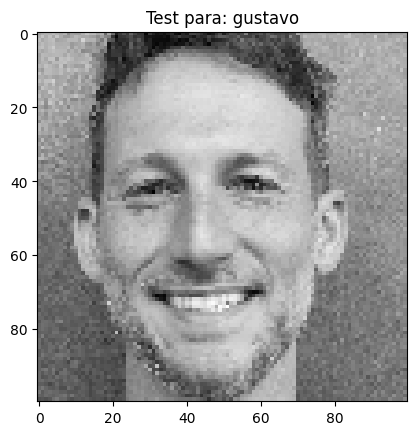

Predicción: lautaro


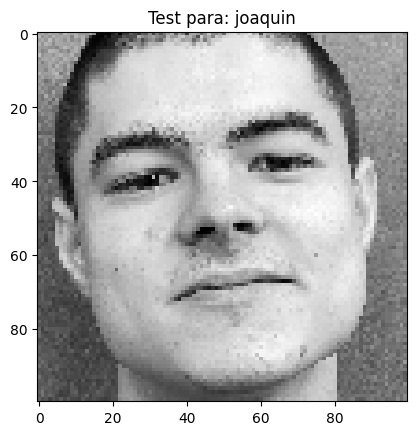

Predicción: joaquin


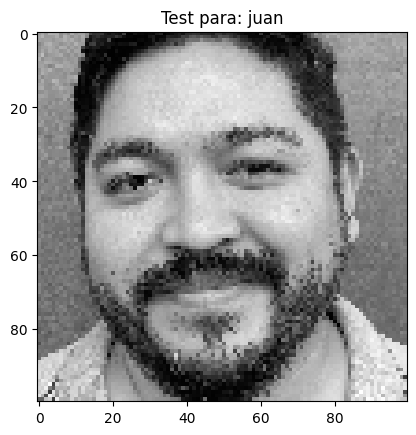

Predicción: juan


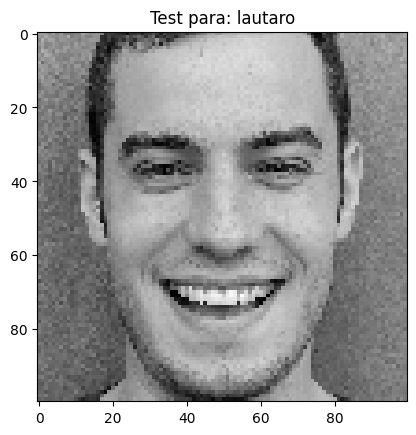

Predicción: lautaro


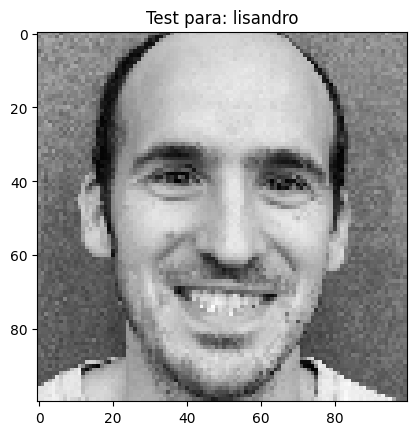

Predicción: noelia


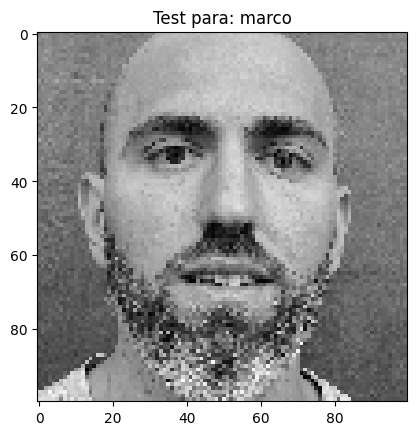

Predicción: marco


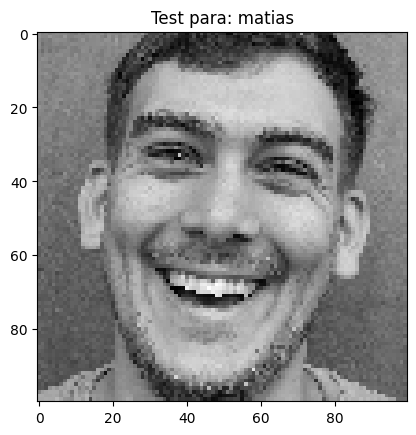

Predicción: matias


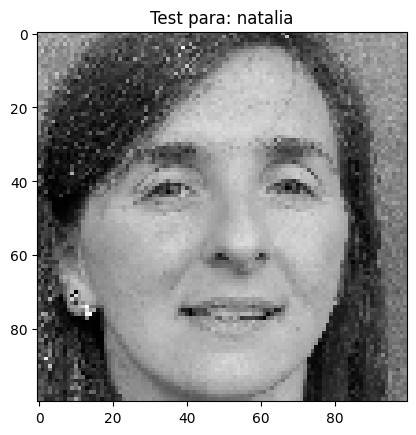

Predicción: natalia


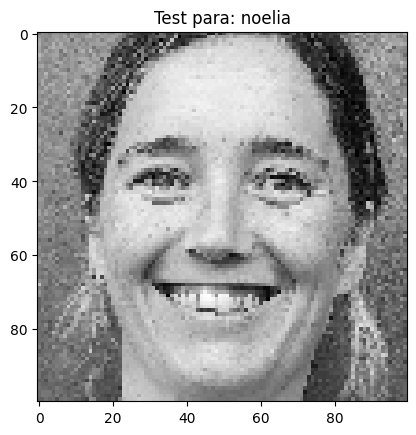

Predicción: noelia


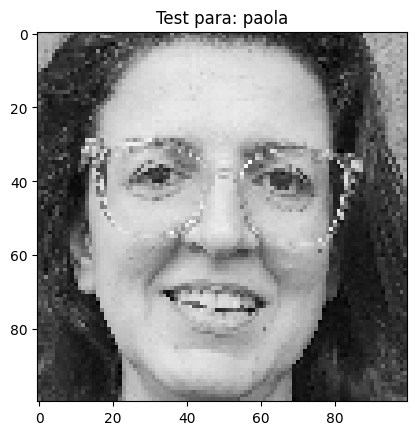

Predicción: paola


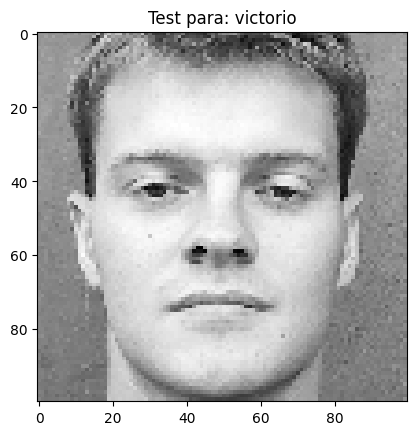

Predicción: victorio


In [13]:
# itero sobre todos
for cara, nombre in zip(datos_imagenes1, file_names_array1):
    cara = np.array(cara).flatten()

    plt.imshow(cara.reshape(dim_reshape,dim_reshape),cmap="gray")
    plt.title(f"Test para: {nombre}")
    plt.show()
    
    prediccion = reconocimiento_facial(cara)
    print(f"Predicción: {prediccion}")


* cuales son las caras más parecidas? sacando las nuestras...

In [14]:
# usando el mimso dataset, que caras son mas parecidas?
nombre_1 = []
nombre_2 = []
distancias = []
for i, name1 in zip(datos_imagenes,file_names_array):
    proj_1 = pca.transform(i.reshape(1,-1))
    for j, name2 in zip(datos_imagenes,file_names_array):
        proj_2 = pca.transform(j.reshape(1,-1))
        distincia = euclidean_distances(proj_1, proj_2)
        nombre_1.append(name1)
        nombre_2.append(name2)
        distancias.append(distincia[0][0])
        
df_distancias = pd.DataFrame({'nombre1':nombre_1, 'nombre2':nombre_2, 'distancia':distancias}) 

In [15]:
# Ejemplo lautaro
df_distancias[(df_distancias["nombre1"]=="lautaro") & (df_distancias["nombre1"]!=df_distancias["nombre2"])].sort_values("distancia")#.iloc[::2]

,nombre1,nombre2,distancia
31207,lautaro,joaquin,2209.237351
28470,lautaro,gustavo,2266.061598
28568,lautaro,noelia,2306.796221
28575,lautaro,noelia,2346.968876
28469,lautaro,gustavo,2429.065747
...,...,...,...
29090,lautaro,federicoR,9447.745673
29099,lautaro,federicoR,9472.621650
29105,lautaro,florencia,9526.922334
29086,lautaro,federicoR,9609.074910


In [16]:
# Distancias Medias
df_distancias_medias = df_distancias[(df_distancias["nombre1"]!=df_distancias["nombre2"])].groupby(["nombre1","nombre2"])["distancia"].mean().reset_index(drop=False)
df_distancias_medias = df_distancias_medias.sort_values("distancia").reset_index(drop=True)
df_distancias_medias.iloc[::2].head(30)

,nombre1,nombre2,distancia
0,gustavo,lautaro,3762.892235
2,federicoG,gustavo,3784.788487
4,gustavo,matias,3809.476339
6,gustavo,gerard,3870.688423
8,victorio,gustavo,3905.599797
10,victorio,lautaro,3987.175049
12,gerard,victorio,4042.240576
14,joaquin,victorio,4092.057576
16,gustavo,noelia,4233.200423
18,gerard,matias,4255.845308
